In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv(r'C:\Users\kousi\Downloads\eeg1.csv')


In [3]:
data.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b     label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00  NEGATIVE  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57   NEUTRAL  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00  POSITIVE  
3      299.0      132.0     -12.40       9.53       9.53     -12.40  POSITIVE  
4       12.0      119.0     -17.60      23.90      23.90     -17.60   NEUTRAL  

[5 rows x 2549 columns]

In [4]:
# Checking for Missing Data
print(data.isnull().sum())

# Handling Missing Data
data = data.fillna(data.mean())


# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64


C:\Users\kousi\AppData\Local\Temp\ipykernel_11612\1991073423.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


C:\Users\kousi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


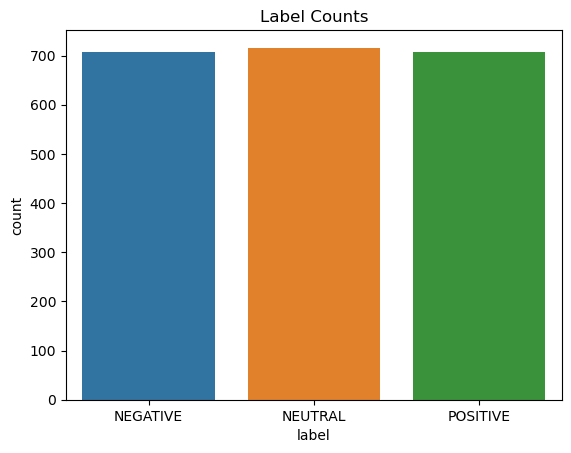

In [5]:
sns.countplot(data['label'])
plt.title('Label Counts')
plt.show()


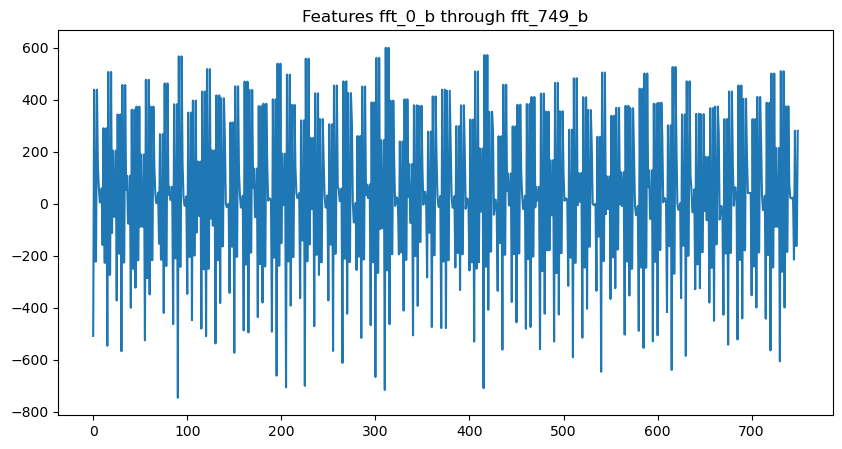

In [6]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(10,5))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [7]:
# Encoding Categorical Data
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [8]:
data.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b  label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00      0  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57      1  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00      2  
3      299.0      132.0     -12.40       9.53       9.53     -12.40      2  
4       12.0      119.0     -17.60      23.90      23.90     -17.60      1  

[5 rows x 2549 columns]

In [9]:
# Feature Scaling and Normalizing Data
scaler = StandardScaler()
X = data.drop('label', axis=1)
X = scaler.fit_transform(X)
y = data['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :5], data['label'], test_size=0.2, random_state=42)


In [12]:
# Initializing the models
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(random_state=42)
lr = LogisticRegression(random_state=42)


In [13]:
# Creating a dictionary of models
models = {'Random Forest': rfc, 'Decision Tree': dtc, 'KNN': knn, 'SVM': svc, 'Logistic Regression': lr}

In [14]:
# Training and Testing the models
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [15]:
# Evaluation of Models
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [16]:
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rfc * 100))
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dtc * 100))
print("KNN Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("SVM Accuracy: {:.2f}%".format(accuracy_svc * 100))
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr * 100))


Random Forest Accuracy: 97.42%
Decision Tree Accuracy: 94.85%
KNN Accuracy: 94.38%
SVM Accuracy: 90.87%
Logistic Regression Accuracy: 87.35%


In [17]:
from sklearn.metrics import classification_report

# Evaluation of Models
y_pred_rfc = rfc.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_lr = lr.predict(X_test)



C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
# Classification report
label = ['positive', 'negative', 'neutral']

print("Random Forest:")
print(classification_report(y_test, y_pred_rfc, target_names=label))


Random Forest:
              precision    recall  f1-score   support

    positive       0.98      0.97      0.97       143
    negative       1.00      0.98      0.99       148
     neutral       0.94      0.98      0.96       136

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



In [19]:
print("Decision Tree:")
print(classification_report(y_test, y_pred_dtc, target_names=label))


Decision Tree:
              precision    recall  f1-score   support

    positive       0.93      0.95      0.94       143
    negative       0.99      0.98      0.99       148
     neutral       0.93      0.91      0.92       136

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



In [20]:
print("KNN:")
print(classification_report(y_test, y_pred_knn, target_names=label))


KNN:
              precision    recall  f1-score   support

    positive       0.90      0.97      0.93       143
    negative       0.98      0.99      0.98       148
     neutral       0.95      0.88      0.91       136

    accuracy                           0.94       427
   macro avg       0.94      0.94      0.94       427
weighted avg       0.94      0.94      0.94       427



In [21]:
print("SVM:")
print(classification_report(y_test, y_pred_svc, target_names=label))


SVM:
              precision    recall  f1-score   support

    positive       0.83      0.99      0.90       143
    negative       0.97      0.96      0.97       148
     neutral       0.95      0.76      0.85       136

    accuracy                           0.91       427
   macro avg       0.92      0.91      0.91       427
weighted avg       0.92      0.91      0.91       427



In [22]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=label))

Logistic Regression:
              precision    recall  f1-score   support

    positive       0.85      0.84      0.85       143
    negative       0.95      0.97      0.96       148
     neutral       0.81      0.80      0.80       136

    accuracy                           0.87       427
   macro avg       0.87      0.87      0.87       427
weighted avg       0.87      0.87      0.87       427



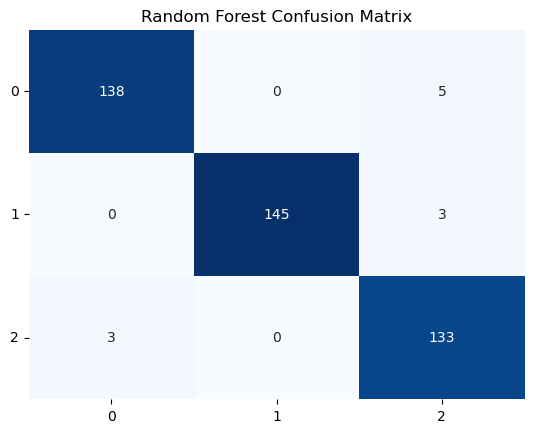

In [23]:
# Random Forest
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()




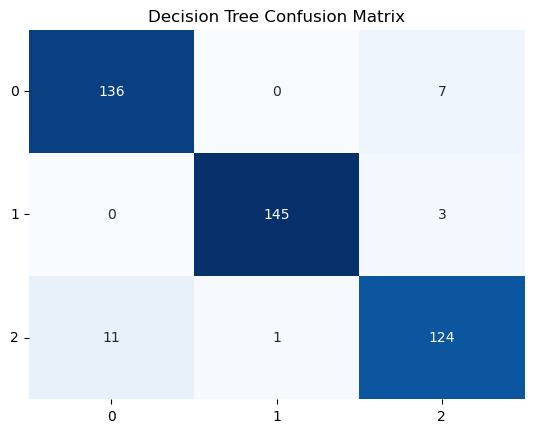

In [24]:
# Decision Tree
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Decision Tree Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()



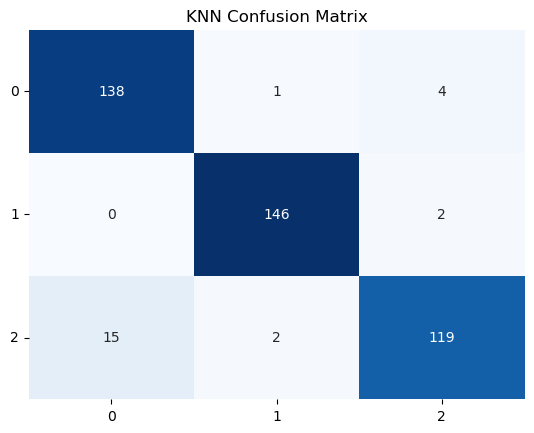

In [25]:
# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('KNN Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()



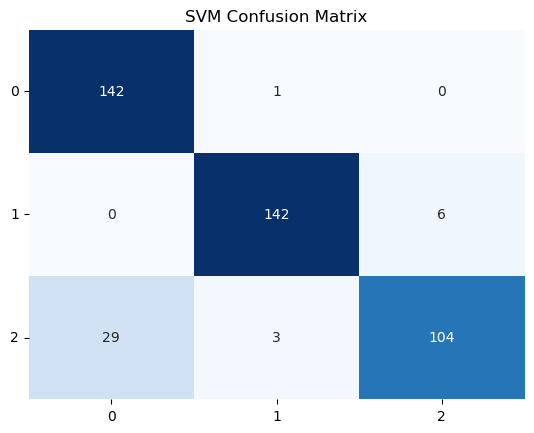

In [26]:
# SVM
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('SVM Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()



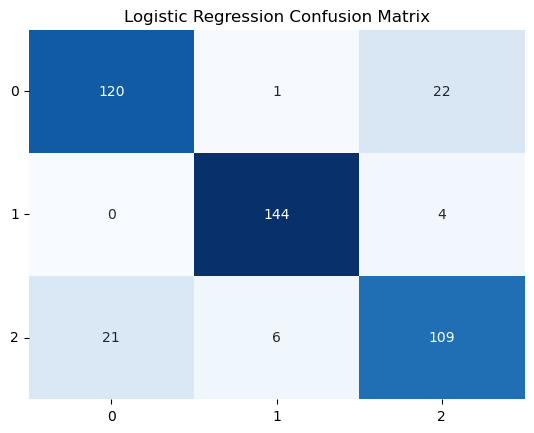

In [27]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Logistic Regression Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5, 2.5], label=label)
plt.yticks(ticks=[0.5, 1.5, 2.5], label=label, rotation=0)
plt.show()

In [28]:
print("----------------------")
print("------Random Forest------")

rf = RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train) 
rfy_pred = rf.predict(X_test)

print()
print("------Classification Report------")
print(classification_report(rfy_pred, y_test))

print()
print("------Accuracy------")
print("Random Forest Accuracy:", rf.score(X_test, y_test))
rfc = round(accuracy_score(rfy_pred, y_test) * 100)

----------------------
------Random Forest------

------Classification Report------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       141
           1       0.98      1.00      0.99       145
           2       0.98      0.94      0.96       141

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427


------Accuracy------
Random Forest Accuracy: 0.9742388758782201


In [29]:
print("----------------------")
print("------KNN------")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print()
print("------Classification Report------")
print(classification_report(knn_y_pred, y_test))

print()
print("------Accuracy------")
print("KNN Accuracy:", knn.score(X_test, y_test))
knn_acc = round(accuracy_score(knn_y_pred, y_test) * 100)


----------------------
------KNN------

------Classification Report------
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       153
           1       0.99      0.98      0.98       149
           2       0.88      0.95      0.91       125

    accuracy                           0.94       427
   macro avg       0.94      0.94      0.94       427
weighted avg       0.95      0.94      0.94       427


------Accuracy------
KNN Accuracy: 0.9437939110070258


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score




In [31]:
# Define the models
models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()]

# Perform cross-validation for each model
for model in models:
    scores = cross_val_score(model, X, y, cv=10)  # 10-fold cross-validation
    print(f"{type(model).__name__} Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression Accuracy: 0.96 (+/- 0.01)
DecisionTreeClassifier Accuracy: 0.96 (+/- 0.01)


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier Accuracy: 0.94 (+/- 0.01)
RandomForestClassifier Accuracy: 0.99 (+/- 0.01)


In [32]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

print("Confusion Matrix - Random Forest")
print(confusion_matrix(rfc_y_pred, y_test))


Confusion Matrix - Random Forest
[[138   0   3]
 [  0 145   0]
 [  5   3 133]]


In [33]:
print('Training accuracy:', rfc.score(X_train, y_train))
print('Testing accuracy:', rfc.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.9742388758782201


In [37]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

print("Confusion Matrix - Decision Tree")
print(confusion_matrix(dtc_y_pred, y_test))


Confusion Matrix - Decision Tree
[[136   0  11]
 [  0 145   1]
 [  7   3 124]]


In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print("Confusion Matrix - K-Nearest Neighbors")
print(confusion_matrix(knn_y_pred, y_test))


Confusion Matrix - K-Nearest Neighbors
[[138   0  15]
 [  1 146   2]
 [  4   2 119]]


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
print('Training accuracy:', knn.score(X_train, y_train))
print('Testing accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.9577712609970674
Testing accuracy: 0.9437939110070258


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kousi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [40]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

print("Confusion Matrix - Support Vector Machine")
print(confusion_matrix(svc_y_pred, y_test))


Confusion Matrix - Support Vector Machine
[[142   0  29]
 [  1 142   3]
 [  0   6 104]]


In [41]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

print("Confusion Matrix - Logistic Regression")
print(confusion_matrix(lr_y_pred, y_test))


Confusion Matrix - Logistic Regression
[[120   0  21]
 [  1 144   6]
 [ 22   4 109]]


C:\Users\kousi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
import pickle
from sklearn.ensemble import RandomForestClassifier

In [44]:


with open('rfc.pkl', 'wb') as file:
    pickle.dump(rfc, file)
